# Task 2: Classification with Logistic Regression
 Description: Build a decision tree classifier to predict a categorical outcome (e.g., predict species of flowers).
# Objectives:
    Preprocess the data (e.g., handling categorical features,
    feature scaling).
    Train and evaluate the logistic regression model.
    Use metrics such as accuracy, precision, recall, and the  ROC curve for evaluation.
    Compare logistic regression with other classifiers like Random Forest or SVM.
    Tools: Python, scikit-learn, pandas, matplotlib.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_species = pd.read_csv('Data/Data/1) iris.csv')
df_species.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#preprocess the data(handling catagorical features, scaling numerical features)
X = df_species.drop('species', axis=1)
y = df_species['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#train and evaluate the logistic regression model
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)
y_pred = LRModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, LRModel.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC-AUC: {roc_auc}")

Logistic Regression - Accuracy: 0.9666666666666667, Precision: 0.9696969696969696, Recall: 0.9666666666666667, ROC-AUC: 1.0


In [16]:
# Compare logistic regression with other models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
    
    # Round the metrics to two decimal places
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, ROC-AUC: {roc_auc:.2f}")

Logistic Regression - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, ROC-AUC: 1.00
Random Forest - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, ROC-AUC: 0.99
SVM - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, ROC-AUC: 1.00


In [ ]:
# Compare logistic regression with other models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Initialize a dictionary to store the metrics
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
    
    # Round the metrics to two decimal places
    results[model_name] = {
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'ROC-AUC': round(roc_auc, 2)
    }
    
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, ROC-AUC: {roc_auc:.2f}")


Logistic Regression - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, ROC-AUC: 1.00
Random Forest - Accuracy: 0.93, Precision: 0.93, Recall: 0.93, ROC-AUC: 0.99
SVM - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, ROC-AUC: 1.00


In [22]:
results_df = pd.DataFrame(results).T
print("\n            Model Performance Metrics:")
print(results_df)


            Model Performance Metrics:
                     Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.97       0.97    0.97     1.00
Random Forest            0.90       0.90    0.90     0.99
SVM                      0.97       0.97    0.97     1.00


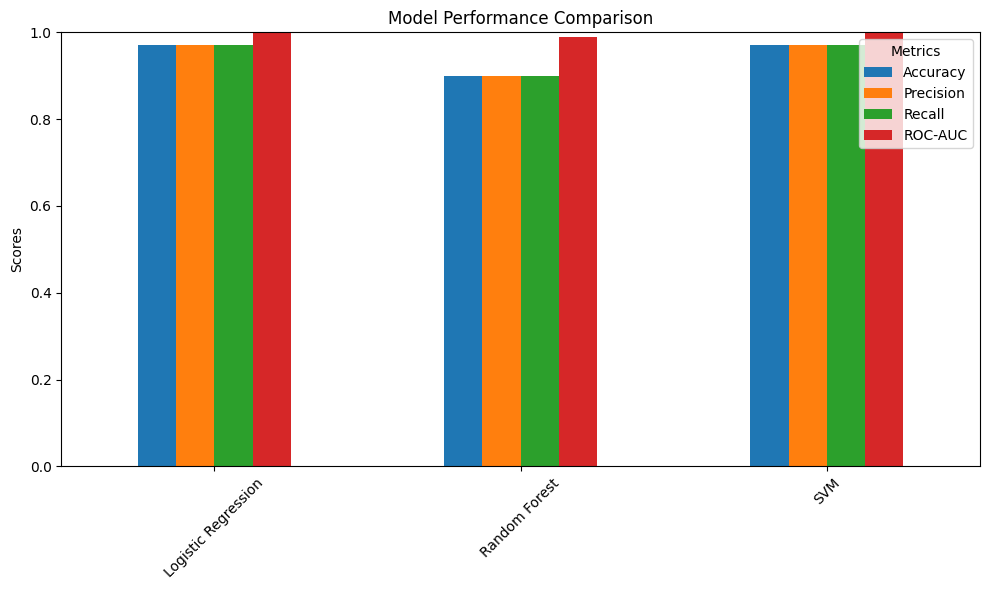

In [24]:
# Plotting the results as a bar graph
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Determine the best model based on a chosen metric (Accuracy)
best_model = max(results, key=lambda x: results[x]['Accuracy'])
best_metrics = results[best_model]
print(f"\nBest Model: {best_model}")
print(f"Metrics: {best_metrics}")


Best Model: Logistic Regression
Metrics: {'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'ROC-AUC': 1.0}
